# Probability and Distribution

## Imports

In [4]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from fractions import Fraction
figsize(6,5)

### Code for P
P is the traditional name for the Probability function:

In [5]:
def P(event, space): 
    "The probability of an event, given a sample space of equiprobable outcomes."
    return Fraction(len(event & space), 
                    len(space))

### Warm-up Problem: Die Roll

What's the probability of rolling an even number with a single six-sided fair die?We can define the sample space D and the event even, and compute the probability.

In [6]:
D    = {1, 2, 3, 4, 5, 6}
even = {   2,    4,    6}

P(even, D)

Fraction(1, 2)

Above, we have calculated a proportion, not a probability. As a proxy for the probability, we can simulate drawing random samples from the data and calculate the proportion (commonly referred to as [hacker statistics](https://speakerdeck.com/jakevdp/statistics-for-hackers)):

## 2. Simulating probabilities

### Coin Toss Example

You toss a coin 30 times and see head 24 times. Is it a fair coin?

**What is the probability of getting 24 heads in 30 tosses ?**

It is the probability of getting heads 24 times or more. 

In [9]:
total_tosses = 30
num_heads = 24
prob_head = 0.5

#0 is tail. 1 is heads. Generate one experiment
experiment = np.random.randint(0,2,total_tosses)
print("Data of the Experiment:", experiment)
#Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1])  #This will give all the heads in the array
head_count = experiment[experiment==1].shape[0] #This will get the count of heads in the array
print("Number of heads in the experiment:", head_count)

Data of the Experiment: [0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1]
Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1 1]
Number of heads in the experiment: 11


### Simulating many times to get the distribution

In the above, we have simulated the scenario once. But this only tells us one potential outcome. To see how likely it is to get 24 heads, we need to simulate it a lot of times and check what proportions ended up with 24 heads.

Run the experiment 100,000 times. Find the percentage of times the experiment returned 24 or more heads. If it is more than 5%, we conclude that the coin is biased.

In [11]:
#Now, the above experiment of flipping coin 30 times needs to be repeated 100 times. 
def coin_toss_experiment(times_to_repeat):
    head_count = np.empty([times_to_repeat,1], dtype=int)
    for times in np.arange(times_to_repeat):
        experiment = np.random.randint(0,2,total_tosses)
        head_count[times] = experiment[experiment==1].shape[0]
    return head_count

Number of heads in first 10 experiments: [[15]
 [11]
 [18]
 [15]
 [16]
 [18]
 [15]
 [13]
 [18]
 [16]]


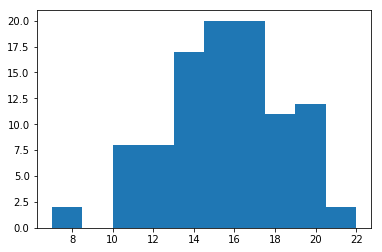

In [6]:
head_count = coin_toss_experiment(100)
print('Number of heads in first 10 experiments:',head_count[:10])
plt.hist(head_count)
plt.show()

Let's use the binomial distribution to answer the same question as above for fair and biased coin:
* If P(heads) = 0.5 (fair coin) and you flip the coin 30 times, how many heads will come up?
* If P(heads) = 0.7 (biased coin) and you flip the coin 30 times, how many heads will come up?

In [12]:
# Set seed for reproducible results
np.random.seed(seed=602)
# Simulate one run of flipping the fair coin 30 times
print("Number of heads in the experiment with fair coin:",np.random.binomial(30, 0.5))
# Simulate one run of flipping the biased coin 30 times
print("Number of heads in the experiment with biased coin:", np.random.binomial(30, 0.7))

Number of heads in the experiment with fair coin: 15
Number of heads in the experiment with biased coin: 24


### Simulate again many times to get the distribution

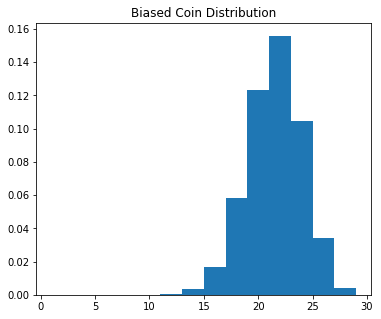

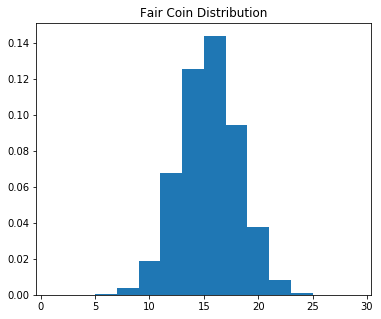

In [13]:
# Simulate 1,000 run of flipping the biased coin 10 times
x = np.random.binomial(30, 0.7, 10000)
# Plot normalized histogram of results
plt.hist(x, density=True, bins=np.arange(1,31,2))
plt.title('Biased Coin Distribution')
plt.show()
# Plot histogram 
x = np.random.binomial(30, 0.5, 10000)
plt.title('Fair Coin Distribution')
plt.hist(x, density=True,bins=np.arange(1,31,2))
plt.show()

##  Conditional Probability


Now that we have a grasp on joint probabilities, lets consider conditional probabilities, that is, the probability of some $A$, knowing that some other $B$ is true. We use the notation $P(A|B)$ to denote this. For example, you can ask the question "What is the probability of a cactus length $<10$, knowing that the cactus species is 'saguaro'?"

#### Example: conditional probability and joint probability
1. What is the probability of a cactus length > 10 ?
2. What is the probability of a cactus length > 10 and Cactus is 'Golden barrel'?
3. What is the probability of a cactus length > 10 if we know it is 'Golden barrel'?


Event : 
       A =  Length
       B =  Cactus Type

In [14]:
import pandas as pd
cactus_length = pd.DataFrame({'Cactus':np.random.choice(['Saguaro','Golden barrel'], 100),
                              'Length':np.random.randint(5,30,100)})
cactus_length.shape

(100, 2)

- What is the probability of a cactus length > 10 ?

In [15]:
sum(cactus_length.Length > 10)/len(cactus_length)

0.7

- What is the probability of a cactus length > 10 and Cactus is 'Golden barrel'?

In [16]:
cactus_length.loc[(cactus_length['Cactus'] == 'Golden barrel') & (cactus_length['Length'] >10)].shape[0]/len(cactus_length)

0.37

- What is the probability of a cactus length > 10 if we know it is 'Golden barrel'?

In [17]:
X = cactus_length.loc[(cactus_length['Cactus'] == 'Golden barrel') & (cactus_length['Length'] >10)].shape[0]
Y = cactus_length.loc[cactus_length['Cactus'] == 'Golden barrel'].shape[0]
print(X/Y)

0.6727272727272727


In [18]:
# Alternative Way
cactus_length_gb = cactus_length.loc[cactus_length['Cactus'] == 'Golden barrel']
sum(cactus_length_gb.Length > 10)/len(cactus_length_gb)

0.6727272727272727

## 4. Probability Distributions

## Discrete Distributions

### Binomial Distribution

We have discussed **binomial distribution** already above but let's look at it again. It is derived from bernoulli's trial.
- Bernoulli trial (or binomial trial): random experiment with 2 possible outcomes
- a binomial distribution describes a binomial variable $B(n, p)$ of 
*n* of Bernoulli trials (which are statistically independent); *p* is the probability of success (and *q* is the probability of failure, 1-*p*)
- Probability of *k* successes:

$$P(k) = \binom{n}{k} p^k q^{n-k}$$

where $\binom{n}{k}$ ("*n choose k*") is the binomial coefficient

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Binomial Distribution')]

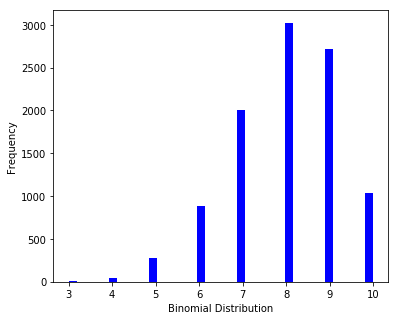

In [19]:
import seaborn as sb
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)
#print(data_binom)
ax = sns.distplot(data_binom,kde=False,color='blue',hist_kws={"linewidth": 25,"alpha":1}) 
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

## Continuous Distribution

### Normal Distribution

<p>Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science. You will encounter it at many places especially in topics of statistical inference. It is one of the assumptions of many data science algorithms too.</p>
<p>A normal distribution has a bell-shaped density curve described by its mean $μ$ and standard deviation $σ$. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. The probability distribution function of a normal density curve with mean $μ$ and standard deviation $σ$ at a given point $x$ is given by:</p>

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)$$

Properties of Normal of Distribution:
- unimodal and symmetric
- two parameters: mean (center of the peak) and standard deviation (spread); $N(\mu, \sigma)$
- we can estimate parameters of $N(\mu, \sigma^2)$ by sample mean ($\bar{x})$ and sample variance ($s^2$)

<p>Below is the figure describing what the distribution looks like:</p>
<p><center><img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1539784816/output_17_0_rlgbfo.png" /></center></p>
<p>Almost 68% of the data falls within a distance of one standard deviation from the mean on either side and 95% within two standard deviations. Also it worth mentioning that a distribution with mean $0$ and standard deviation $1$ is called a <strong>standard normal distribution</strong>.</p>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Normal Distribution')]

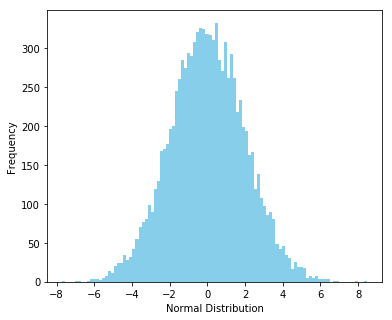

In [20]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=2)
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

**Standard normal distribution with zero mean and unit variance, $N(0, 1)$:**

## External Links for deep dive:
https://www.khanacademy.org/math/statistics-probability/probability-library

https://www.khanacademy.org/math/statistics-probability

https://www.khanacademy.org/math/ap-statistics/probability-ap/stats-conditional-probability/v/bayes-theorem-visualized

https://www.datascience.com/blog/introduction-to-bayesian-inference-learn-data-science-tutorials

https://en.wikipedia.org/wiki/Bayes%27_theorem
    
https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb